In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [3]:

class pca_calc:
    def var_explained(self, S, plot=True, show_df=True):
        """
        S = list of variances of components (can be read from the S/Sigma matrix)
        plot = to plot or not
        show_df = to show df with varaince explained or not
        """
        S = np.array(S)

        # df with variance explained
        df_var_exp = pd.DataFrame(columns=["k", "var_explained"])
        for i in range(len(S)):
            t = np.sum(S[0 : i + 1] ** 2) / np.sum(S ** 2)
            df_var_exp.loc[i] = [i + 1, t]

        # plot of variance explained
        plt.plot(df_var_exp["k"], df_var_exp["var_explained"])
        plt.scatter(df_var_exp["k"], df_var_exp["var_explained"])
        plt.title("Variance explained")
        plt.xlim(np.min(df_var_exp["k"]), np.max(df_var_exp["k"]))
        plt.ylim(0, 1)
        if plot:
            plt.show()

        if show_df:
            print(df_var_exp)
        return df_var_exp

    def proj(self, V, x, components=None, V_full=False):
        """
        V = V matrix from pca
        components = principal components to project onto
        V_full = whether the V matrix contains entire V matrix (if not only the columns of the components to project on is given in V, fx for 2 compenents, V should be a N*2 matrix)
        x = observation to project
        """

        V = np.array(V)
        x = np.array(x)

        if V_full:
            assert components != None
            components = [c - 1 for c in components]
            V = V[:, components]
            # V = V.T
            proj_coord = x @ V
            # proj_coord = p[components]
            components = [c + 1 for c in components]
        else:
            # V = V.T
            proj_coord = x @ V

        print(
            "The projected coordinates on component {} are: {}".format(
                components, proj_coord
            )
        )
        return proj_coord

    def draw_curve_from_diagonal_values(self,values):
        """
        :param values: singular_values e.g [17.4, 7.3, 4.3]
        :return:
        """
        squares = np.square(values)
        sum = np.sum(squares)
        rho = squares / (np.ones(len(squares)) * sum)
        threshold = 0.9

        # Plot variance explained
        plt.figure()
        plt.plot(range(1, len(rho) + 1), rho, 'x-')
        plt.plot(range(1, len(rho) + 1), np.cumsum(rho), 'o-')
        plt.plot([1, len(rho)], [threshold, threshold], 'k--')
        plt.title('Variance explained by principal components')
        plt.xlabel('Principal component')
        plt.ylabel('Variance explained')
        plt.legend(['Individual', 'Cumulative', 'Threshold'])
        plt.grid()
        plt.show()

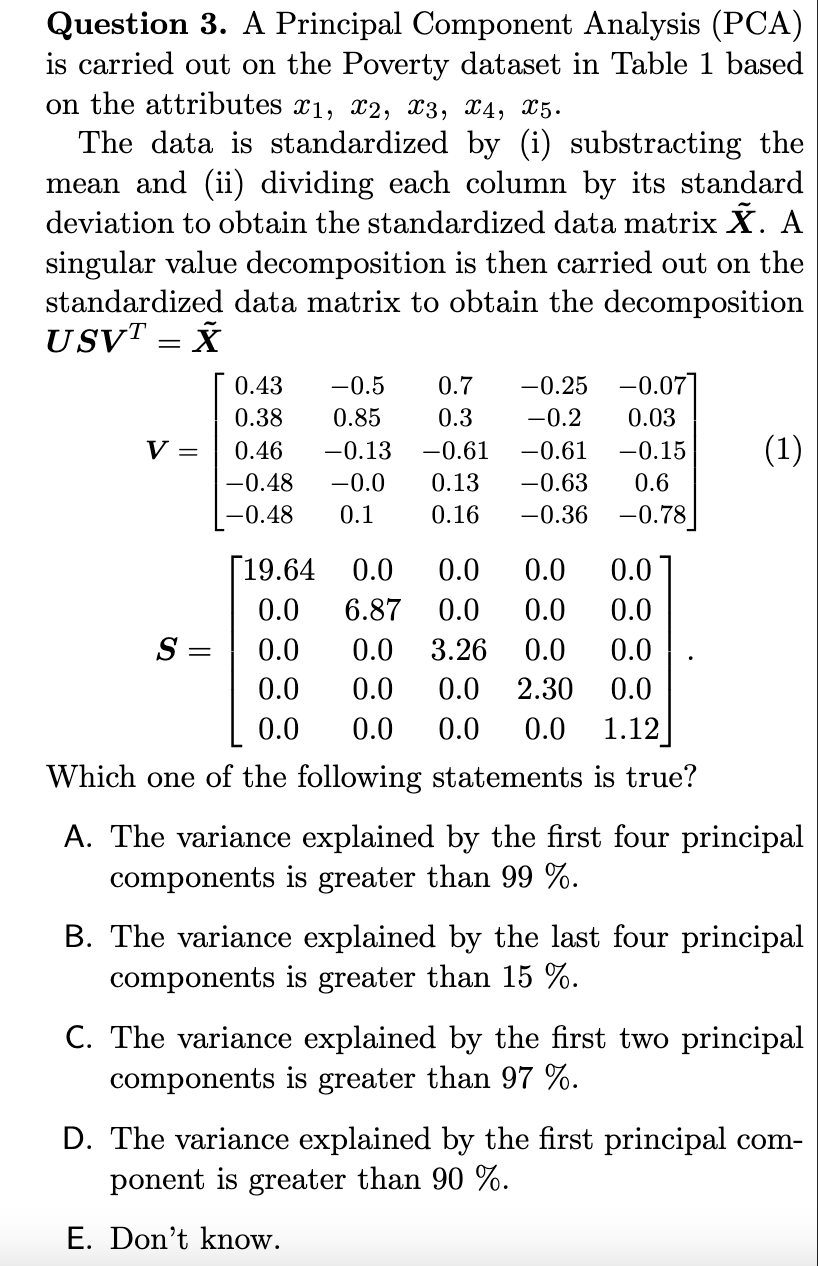

In [10]:
display(Image(filename='figures/pca.png', width=400))

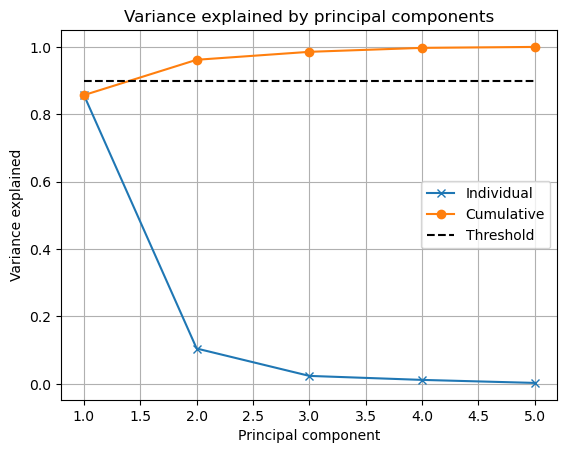

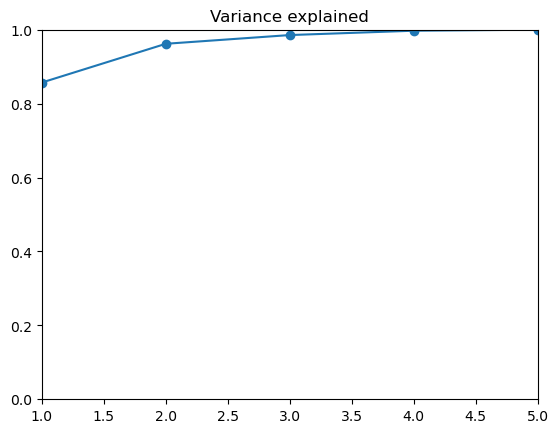

     k  var_explained
0  1.0       0.856989
1  2.0       0.961848
2  3.0       0.985460
3  4.0       0.997213
4  5.0       1.000000


,k,var_explained
0,1.0,0.856989
1,2.0,0.961848
2,3.0,0.985460
3,4.0,0.997213
4,5.0,1.000000


In [6]:
# spring 2020 #3
# From the output we see A must be correct
pca = pca_calc()
S = [19.64,6.87,3.26,2.30,1.12]
pca.draw_curve_from_diagonal_values(S)
pca.var_explained(S)

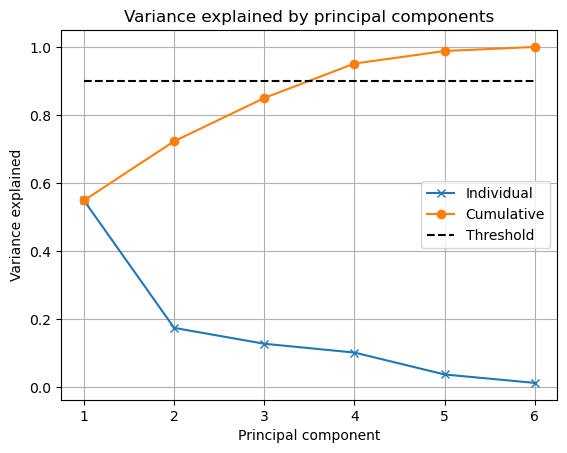

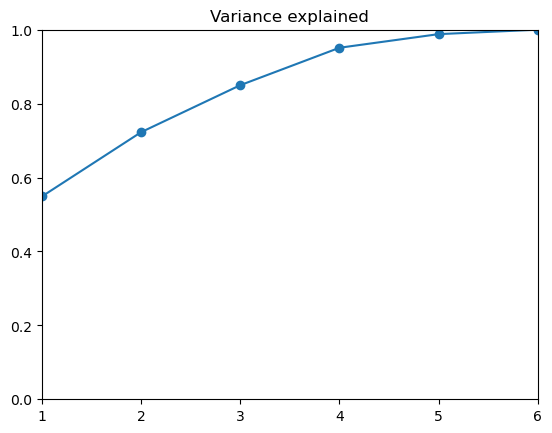

     k  var_explained
0  1.0       0.548698
1  2.0       0.722595
2  3.0       0.849797
3  4.0       0.951076
4  5.0       0.987957
5  6.0       1.000000


,k,var_explained
0,1.0,0.548698
1,2.0,0.722595
2,3.0,0.849797
3,4.0,0.951076
4,5.0,0.987957
5,6.0,1.000000


In [5]:
# spring 2018 #2
pca = pca_calc()
S = [13.5,7.6,6.5,5.8,3.5, 2]
pca.draw_curve_from_diagonal_values(S)
pca.var_explained(S)

Projection of X onto V

In [6]:
# spring 2018 #3

pca = pca_calc()
V = [[0.38, -0.51, 0.23, 0.47, -0.55, 0.11],
        [0.41, 0.41, -0.53, 0.24, 0.00, 0.58],
        [0.50, 0.34, -0.13, 0.15, -0.05, -0.77],
        [0.29, 0.48, 0.78, -0.17, 0.00, 0.23],
        [0.45, -0.42, 0.09, 0.03, 0.78, 0.04],
        [0.39, -0.23, -0.20, -0.82, -0.30, 0.04]]
x = [-0.1, 0.2, 0.1, -0.3, 1, 0.5]
pca.proj(V, x)

The projected coordinates on component None are: [ 0.652 -0.512 -0.386 -0.313  0.68   0.019]


array([ 0.652, -0.512, -0.386, -0.313,  0.68 ,  0.019])

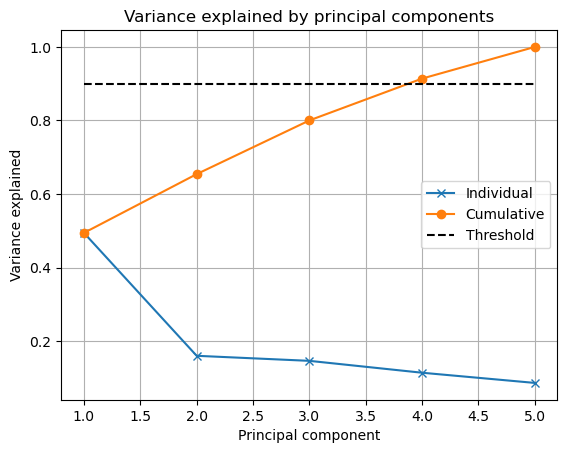

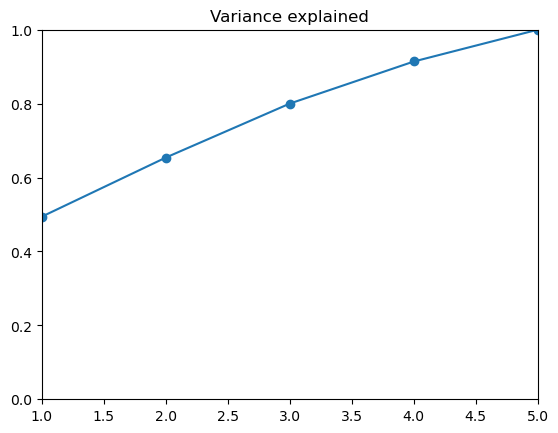

     k  var_explained
0  1.0       0.494169
1  2.0       0.654022
2  3.0       0.800130
3  4.0       0.913920
4  5.0       1.000000


,k,var_explained
0,1.0,0.494169
1,2.0,0.654022
2,3.0,0.800130
3,4.0,0.913920
4,5.0,1.000000


In [3]:
# spring 2020 #3
# From the output we see A must be correct
pca = pca_calc()
S = [14.4,8.19,7.83,6.91,6.01]
pca.draw_curve_from_diagonal_values(S)
pca.var_explained(S)

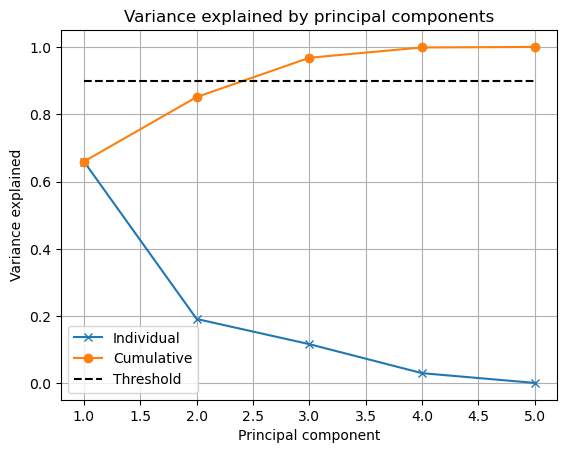

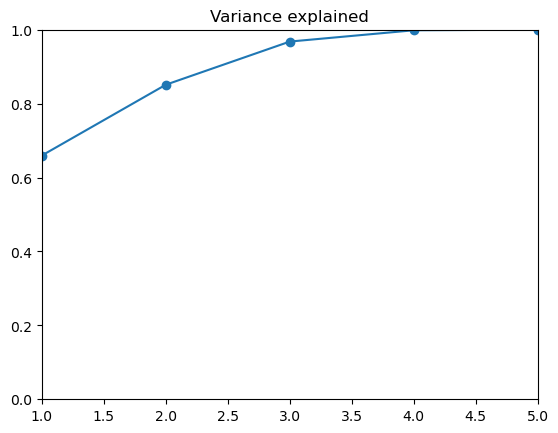

     k  var_explained
0  1.0       0.659534
1  2.0       0.851100
2  3.0       0.967851
3  4.0       0.998396
4  5.0       1.000000


,k,var_explained
0,1.0,0.659534
1,2.0,0.851100
2,3.0,0.967851
3,4.0,0.998396
4,5.0,1.000000


In [4]:
# spring 2020 #3
# From the output we see A must be correct
pca = pca_calc()
S = [43.4,23.39,18.26,9.34,2.14]
pca.draw_curve_from_diagonal_values(S)
pca.var_explained(S)

#MAP OBSERVATION TO PRINCIPAL COMPNENTS

In [1]:
import numpy as np

V = np.fromstring("""0.11	-0.8	0.3	-0.17	-0.48
-0.58	-0.31	0.01	-0.5	0.56
0.49	0.08	-0.49	-0.72	-0.07
0.6	-0.36	0.04	0.27	0.66
-0.23	-0.36	-0.82	0.37	-0.09
""", dtype=float, sep=' ').reshape(5,5)

x1 = np.array([15.5-12.9, 59.2-58.2, 1.4-1.7, 1438-1436.8, 5.3-4.1]) 

print(f"the b matrix (mapping of x into the component plane) is \n\t{x1 @ V}")

the b matrix (mapping of x into the component plane) is 
	[ 3.000e-03 -3.278e+00  1.000e-03  4.200e-02  1.700e-02]
